# Comparison of User Rating vs Average Cost for Two People up to $200

## Objective
This program was written to create a scatter plot of all restaurants with an average cost for two people of $200 or less.

### Comments:
This program reads in a CSV of cleansed data of the top 497 restaurants in Australia. Three restaurants were removed from original dataset containing the top 500 restaurants in Australia due to these record containing incomplete data. The data has then been filtered to only contain restaurants with an average cost for two people of $200 or less.

In [1]:
#Import required modules and styles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

### Comments:
The first column of the file has been dropped to avoid confusion with the dataframe index when filtering the dataframe to produce the final data required for this scatter plot.

In [2]:
#Read in required data and drop first column
df = pd.read_csv('../Project1_exploration/output_data/Top_497.csv')
restaurants = df.drop('Unnamed: 0', axis=1)
restaurants.head(3)

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,590,224,"French, European"
1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1234,329,Japanese


### Comments:
The data has been filtered to only contain restaurants with an average cost per two people of less than or equal to $200. The reset has been reset to make it easier to determine the required variables to produce the scatter plot. A CSV has also been produced to aid further analysis on this filtered dataframe.

In [3]:
#Filter data by average cost for two less than or equal to $200, reset index and produce CSV file
filt_200 = restaurants['Average Cost for two'] <=200
restaurants_200 = restaurants[filt_200]
restaurants_200 = restaurants_200.reset_index(drop=True)
restaurants_200.to_csv('filt_200.csv')
restaurants_200.head(3)

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,590,224,"French, European"
1,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
2,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


In [4]:
#Define plot variables
x1 = df.iloc[0:93, 9]
y1 = df.iloc[0:93, 10]
x2 = df.iloc[94:185, 9]
y2 = df.iloc[94:185, 10]
x3 = df.iloc[186:285, 9]
y3 = df.iloc[186:285, 10]
x4 = df.iloc[286:381, 9]
y4 = df.iloc[286:381, 10]
x5 = df.iloc[382:477, 9]
y5 = df.iloc[382:477, 10]

### Comments
Using the declared variables above, a scatter plot has been produced, separating the data of each city to determine if there are insights that can be gathered from each city. The axis limits and plot and font size have been adjusted to provide a better representation of the graphed data. In order to place the legend to the left centre of the plot, the plot has been shifted to the right and legend box parameters adjusted. Title, axis labels and gridlines have been added to aid clarity. The final plot has been saved to file for ease of adding to the presentation slides.

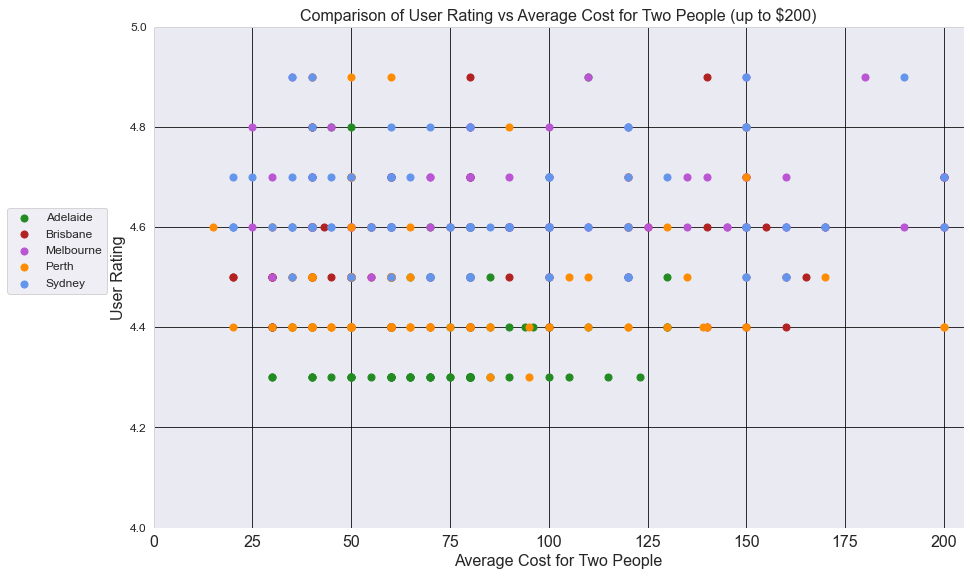

In [21]:
#Specify plot to be a scatter plot and add variables
plt.scatter(x5,y5, label='Adelaide', color='forestgreen', s=50)
plt.scatter(x3,y3, label='Brisbane', color='firebrick', s=50)
plt.scatter(x2,y2, label='Melbourne', color='mediumorchid', s=50)
plt.scatter(x4,y4, label='Perth', color='darkorange', s=50)
plt.scatter(x1,y1, label='Sydney', color='cornflowerblue', s=50)

#Set plot x and y axis limits
plt.axis([0, 205, 4.0, 5.0])

#Adjust size of graph
fig = plt.gcf()
fig.set_size_inches(15, 12)

#Set font sizes
small = 12
medium = 16
large = 24

plt.rc('font', size=medium)     
plt.rc('axes', titlesize=medium)     
plt.rc('axes', labelsize=medium) 
plt.rc('xtick', labelsize=medium)   
plt.rc('ytick', labelsize=small)   
plt.rc('legend', fontsize=small)  
plt.rc('figure', titlesize=large)

#Add legend and set graph and legend position
plt.subplots_adjust(left=0.15, bottom=0.3)
plt.legend(bbox_to_anchor=(-0.05, 0.65), loc='upper right')

#Add title, axis labels and gridlines
plt.title('Comparison of User Rating vs Average Cost for Two People (up to $200)')
plt.xlabel('Average Cost for Two People')
plt.ylabel('User Rating')
plt.grid(which='major', linestyle='-', color='black')

#Save plot
plt.savefig("scatter_200.png")